# Imports

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import cv2
import pydot
import time
import collections

print(tf.__version__)
print(np.__version__)
print(pd.__version__)
print(cv2.__version__)
print(pydot.__version__)

2.4.0
1.19.5
1.1.5
4.5.1
1.4.2


# Load and Resize the data

In [2]:
#load_dataset function to load the data and resize the images to 50x50
def load_dataset(directory):
  images = []
  labels = []
  for idx, label in enumerate(uniq_labels):
    for file in os.listdir(directory + '/'+label):
      filepath = directory +'/'+ label + "/" + file
      img = cv2.resize(cv2.imread(filepath),(50,50))
      images.append(img)
      labels.append(idx)
  images = np.asarray(images)
  labels = np.asarray(labels)
  return images, labels

# Display the images

In [3]:
#display_images function to show examples
def display_images(x_data,y_data, title, display_label = True):
    x, y = x_data,y_data
    fig, axes = plt.subplots(5, 8, figsize = (18, 5))
    fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
    fig.suptitle(title, fontsize = 18)
    for i, ax in enumerate(axes.flat):
        ax.imshow(cv2.cvtColor(x[i], cv2.COLOR_BGR2RGB))
        if display_label:
            ax.set_xlabel(uniq_labels[y[i]])
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

# Load the data 

In [4]:
#loading_dataset into X_pre and Y_pre
data_dir = "E:/ENGR 895/dataset_sample/asl_6"
uniq_labels = sorted(os.listdir(data_dir))
X_pre, Y_pre = load_dataset(data_dir)
print(X_pre.shape, Y_pre.shape)

(21000, 50, 50, 3) (21000,)


# Split the data

In [5]:
#spliting dataset into 80% train, 10% validation and 10% test data
X_train, X_test, Y_train, Y_test = train_test_split(X_pre, Y_pre, train_size = 0.8)
X_test, X_eval, Y_test, Y_eval = train_test_split(X_test, Y_test, test_size = 0.5)

In [ ]:
%matplotlib notebook

Train images shape (16800, 50, 50, 3) (16800,)
Test images shape (2100, 50, 50, 3) (2100,)
Evaluate image shape (2100, 50, 50, 3) (2100,)
Printing the labels ['A', 'B', 'C', 'D', 'E', 'F', 'nothing'] 7


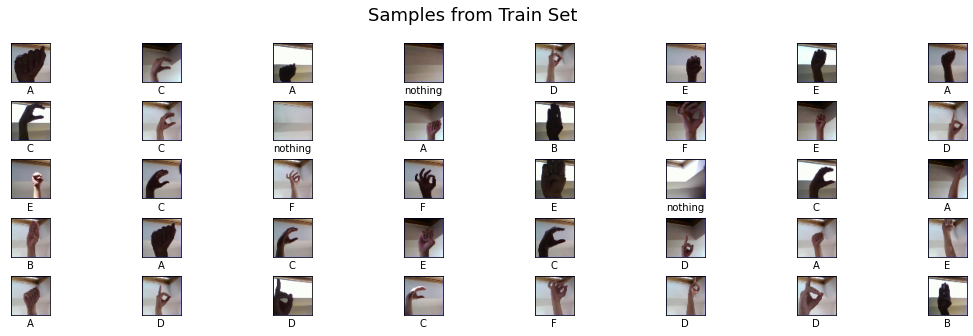

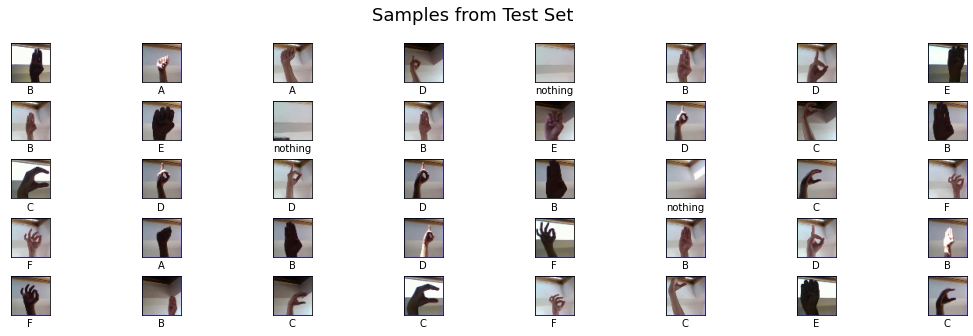

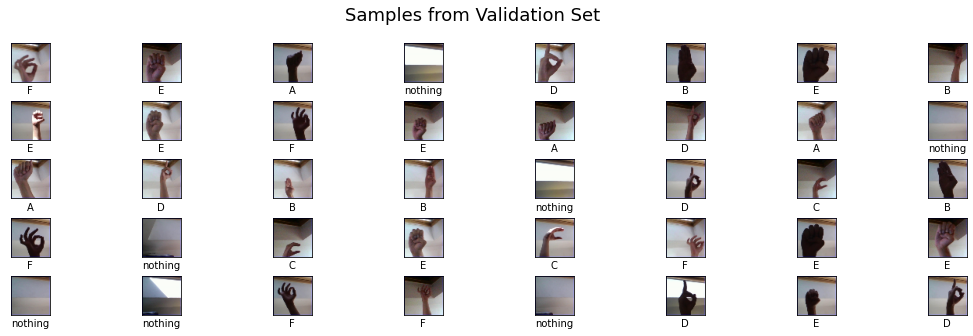

In [6]:
#print shapes and show examples for each set
print("Train images shape",X_train.shape, Y_train.shape)
print("Test images shape",X_test.shape, Y_test.shape)
print("Evaluate image shape",X_eval.shape, Y_eval.shape)
print("Printing the labels",uniq_labels, len(uniq_labels))
display_images(X_train,Y_train,'Samples from Train Set')
display_images(X_test,Y_test,'Samples from Test Set')
display_images(X_eval,Y_eval,'Samples from Validation Set')

# Normalize the data 

In [7]:
# converting Y_tes and Y_train to One hot vectors using to_categorical
# example of one hot => '1' is represented as [0. 1. 0. . . . . 0.]
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_eval = to_categorical(Y_eval)
X_train = X_train / 255.
X_test = X_test/ 255.
X_eval = X_eval/ 255.

# Build the Model

In [8]:
# building our model
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation ='relu', input_shape=(50,50,3)),
        tf.keras.layers.Conv2D(16, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(16, (3,3), activation ='relu'),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 16)        2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 32)        9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        9

In [9]:
#compiling the model
#default batch size 32
#default learning rate is 0.001
model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'],)

In [10]:
#start training(fitting) the data
history = model.fit(X_train, Y_train, epochs=20, verbose=1,
                validation_data=(X_eval, Y_eval))

Epoch 1/20
525/525 [==============================] - 40s 75ms/step - loss: 1.6192 - accuracy: 0.3125 - val_loss: 0.5302 - val_accuracy: 0.8086
Epoch 2/20
525/525 [==============================] - 42s 81ms/step - loss: 0.3068 - accuracy: 0.8858 - val_loss: 0.1923 - val_accuracy: 0.9405
Epoch 3/20
525/525 [==============================] - 42s 80ms/step - loss: 0.0920 - accuracy: 0.9680 - val_loss: 0.0365 - val_accuracy: 0.9890
Epoch 4/20
525/525 [==============================] - 41s 79ms/step - loss: 0.0504 - accuracy: 0.9814 - val_loss: 0.0140 - val_accuracy: 0.9962
Epoch 5/20
525/525 [==============================] - 41s 78ms/step - loss: 0.0325 - accuracy: 0.9894 - val_loss: 0.0241 - val_accuracy: 0.9943
Epoch 6/20
525/525 [==============================] - 42s 80ms/step - loss: 0.0200 - accuracy: 0.9929 - val_loss: 0.0320 - val_accuracy: 0.9886
Epoch 7/20
525/525 [==============================] - 43s 81ms/step - loss: 0.0615 - accuracy: 0.9801 - val_loss: 0.0372 - val_accuracy:

# Save the Model

In [11]:
#save the model
model.save('gesture_model.h5')

In [12]:
#save the model
model.save('gesture_model.keras')

In [13]:
# Load your model
model = tf.keras.models.load_model('gesture_model.keras')

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('gesture_model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\AYUSHI~1\AppData\Local\Temp\tmpchgqdye2\assets


# Plot the Accuracy & Loss 

In [14]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

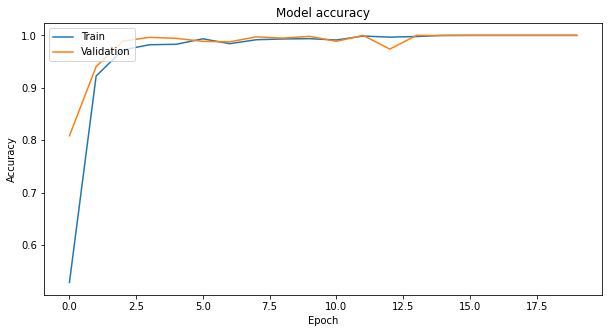

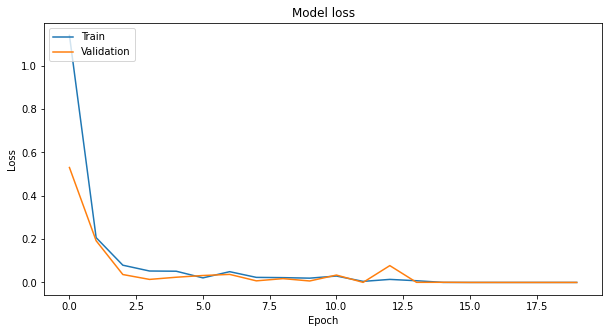

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Confusion Matrix

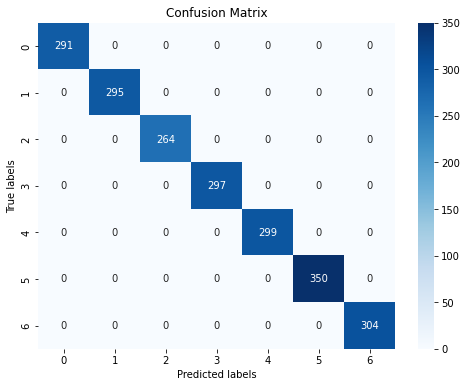

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted probabilities for each class
Y_pred_probs = model.predict(X_eval)

# Get the predicted class indices
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(np.argmax(Y_eval, axis=1), Y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [17]:
#save the model
model.save('gesture_model')

INFO:tensorflow:Assets written to: gesture_model\assets


INFO:tensorflow:Assets written to: gesture_model\assets


In [18]:
print(os.getcwd())


C:\Users\Ayushi Ashok Patel
